In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Copies de sauvegarde

# Chemins des fichiers originaux
chemin_category_tree = 'drive/MyDrive/category_tree.csv'
chemin_events = 'drive/MyDrive/events.csv'
chemin_item_properties_part1 = 'drive/MyDrive/item_properties_part1.csv'
chemin_item_properties_part2 = 'drive/MyDrive/item_properties_part2.csv'

# Lire les fichiers originaux
df_cat = pd.read_csv('drive/MyDrive/category_tree.csv')
df_events = pd.read_csv('drive/MyDrive/events.csv')
df_it_prop1 = pd.read_csv('drive/MyDrive/item_properties_part1.csv')
df_it_prop2 = pd.read_csv('drive/MyDrive/item_properties_part2.csv')

# Enregistrer les copies sous de nouveaux noms
df_cat.to_csv('drive/MyDrive/category_tree.csv', index=False)
df_events.to_csv('drive/MyDrive/events.csv', index=False)
df_it_prop1.to_csv('drive/MyDrive/item_properties_part1.csv', index=False)
df_it_prop2.to_csv('drive/MyDrive/item_properties_part2.csv', index=False)

In [ ]:
#

In [ ]:
# Analyse descriptive, traitement et exploration initiale

In [ ]:
#1er fichier sur 4

In [ ]:
copied_path = 'drive/MyDrive/category_tree.csv' #remove ‘content/’ from path then use
df_cat = pd.read_csv(copied_path)

In [ ]:
#Exploration initiale et Analyse descriptive de df_cat

In [ ]:
display(df_cat.head(10))
display(df_cat.tail(10))
display(df_cat.info())
df_cat.describe()

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0
5,231,NaN
6,542,378.0
7,1146,542.0
8,1140,542.0
9,1479,1537.0


,categoryid,parentid
1659,460,745.0
1660,112,381.0
1661,1354,1492.0
1662,486,25.0
1663,456,1125.0
1664,49,1125.0
1665,1112,630.0
1666,1336,745.0
1667,689,207.0
1668,761,395.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB


None

,categoryid,parentid
count,1669.000000,1644.000000
mean,849.285201,847.571168
std,490.195116,505.058485
min,0.000000,8.000000
25%,427.000000,381.000000
50%,848.000000,866.000000
75%,1273.000000,1291.000000
max,1698.000000,1698.000000


In [ ]:
#Le code suivant va d'abord identifier les valeurs manquantes dans df_cat,
#puis il va calculer des statistiques descriptives telles que le nombre de catégories uniques et de parents uniques,
#et la fréquence des différents types d'événements (comme les vues, les clics, etc.).
#Enfin, il visualisera ces informations à l'aide d'un histogramme en barres et le nbr de doublons.

'Valeurs manquantes'

categoryid     0
parentid      25
dtype: int64

'Nombre de catégorie uniques'

1669

'Nombre de parents uniques'

362

'Fréquences catégorie parents'

250.0     31
362.0     22
1009.0    22
351.0     19
1259.0    18
1687.0    17
945.0     15
312.0     15
1482.0    13
92.0      13
Name: parentid, dtype: int64

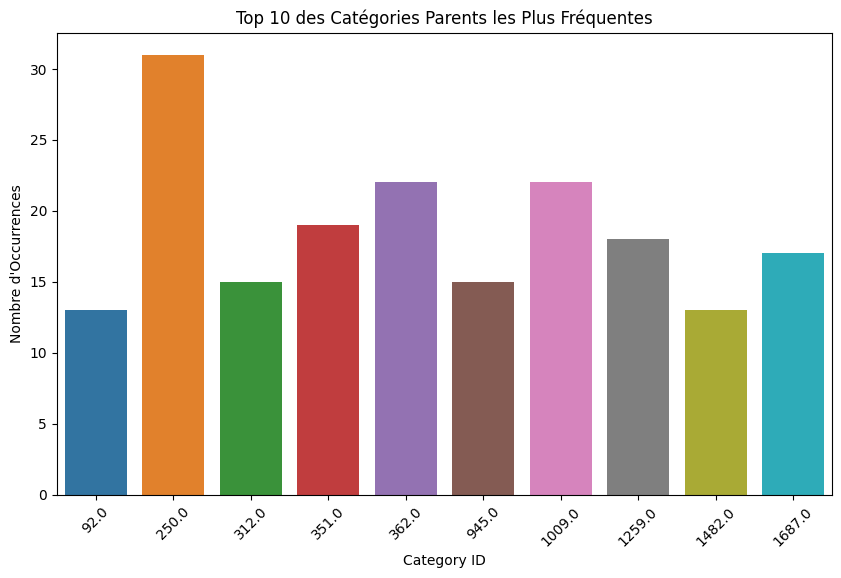

'Nombre de doublons dans df_events:'

0

In [ ]:

# Analyse des valeurs manquantes
missing_values = df_cat.isnull().sum()
display("Valeurs manquantes",missing_values)

# Statistiques descriptives
unique_categories = df_cat['categoryid'].nunique()
unique_parents = df_cat['parentid'].nunique()
top_parent_categories = df_cat['parentid'].value_counts().head(10)

display("Nombre de catégorie uniques",unique_categories)
display("Nombre de parents uniques",unique_parents)
display("Fréquences catégorie parents",top_parent_categories)

# Préparation des données pour la visualisation

# On compte le nombre d'occurrences de chaque parentid
parent_counts = df_cat['parentid'].value_counts()

# Visualisation : Histogramme des 10 catégories parent les plus fréquentes
plt.figure(figsize=(10, 6))
sns.barplot(x=parent_counts.index[:10], y=parent_counts.values[:10])
plt.title('Top 10 des Catégories Parents les Plus Fréquentes')
plt.xlabel('Category ID')
plt.ylabel('Nombre d\'Occurrences')
plt.xticks(rotation=45)
plt.show()


# Identification des doublons df_cat
duplicates_events = df_cat.duplicated().sum()
display("Nombre de doublons dans df_events:", duplicates_events)

In [ ]:
#

In [ ]:
#2ème fichier sur 4

In [ ]:
copied_path = 'drive/MyDrive/events.csv' #remove ‘content/’ from path then use
df_events = pd.read_csv(copied_path)

In [ ]:
#Exploration initiale et Analyse descriptive de df_events

In [ ]:
display(df_events.head(10))
display(df_events.tail(10))
display(df_events.info())
df_events.describe()

,timestamp,visitorid,event,itemid,transactionid
0,1435378983392,389525,view,187002,NaN
1,1432580061072,1179879,view,341578,NaN
2,1431732489334,958126,view,328966,NaN
3,1441164669677,527666,view,212144,NaN
4,1440180907132,1019714,view,153033,NaN
5,1439009373636,102445,view,270231,NaN
6,1438426930670,392293,view,189558,NaN
7,1437042097183,922849,view,442431,NaN
8,1431915871975,186130,view,466436,NaN
9,1438041237180,1392733,view,100847,NaN


,timestamp,visitorid,event,itemid,transactionid
275600,1433203211392,103251,view,260609,NaN
275601,1432362111119,97853,view,318333,NaN
275602,1434649734614,760986,view,425726,NaN
275603,1441916440851,90375,view,438862,NaN
275604,1440552061430,394607,view,417927,NaN
275605,1437731804672,1080579,view,304685,NaN
275606,1442190245509,287804,view,232518,NaN
275607,1435609567512,1159509,view,108149,NaN
275608,1434311757503,1131650,view,218856,NaN
275609,1440451597711,286502,view,306297,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275610 entries, 0 to 275609
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   timestamp      275610 non-null  int64  
 1   visitorid      275610 non-null  int64  
 2   event          275610 non-null  object 
 3   itemid         275610 non-null  int64  
 4   transactionid  2250 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 10.5+ MB


None

,timestamp,visitorid,itemid,transactionid
count,2.756100e+05,2.756100e+05,275610.000000,2250.000000
mean,1.436421e+12,7.030114e+05,234603.260567,8963.884889
std,3.369177e+09,4.054316e+05,134450.643495,5076.280435
min,1.430622e+12,3.000000e+00,6.000000,9.000000
25%,1.433469e+12,3.505660e+05,117311.000000,4637.250000
50%,1.436450e+12,7.028995e+05,235647.000000,9039.500000
75%,1.439228e+12,1.053012e+06,350723.750000,13264.250000
max,1.442545e+12,1.407575e+06,466867.000000,17670.000000


In [ ]:
#Le code suivant va d'abord identifier les valeurs manquantes dans df_events,
#puis il va calculer des statistiques descriptives telles que le nombre de visiteurs uniques et d'articles uniques,
#et la fréquence des différents types d'événements (comme les vues, les clics, etc.).
#Enfin, il visualisera ces informations à l'aide d'un histogramme en barres et le nbr de doublons

'Valeurs manquantes dans df_events'

timestamp             0
visitorid             0
event                 0
itemid                0
transactionid    273360
dtype: int64

'Nombre de visiteurs uniques'

221012

"Nombre d'articles uniques"

90424

'Fréquences des événements'

view           266522
addtocart        6838
transaction      2250
Name: event, dtype: int64

'Top 10 des articles les plus consultés'

187946    348
461686    249
5411      221
370653    196
219512    180
298009    175
96924     165
257040    164
309778    158
384302    158
Name: itemid, dtype: int64

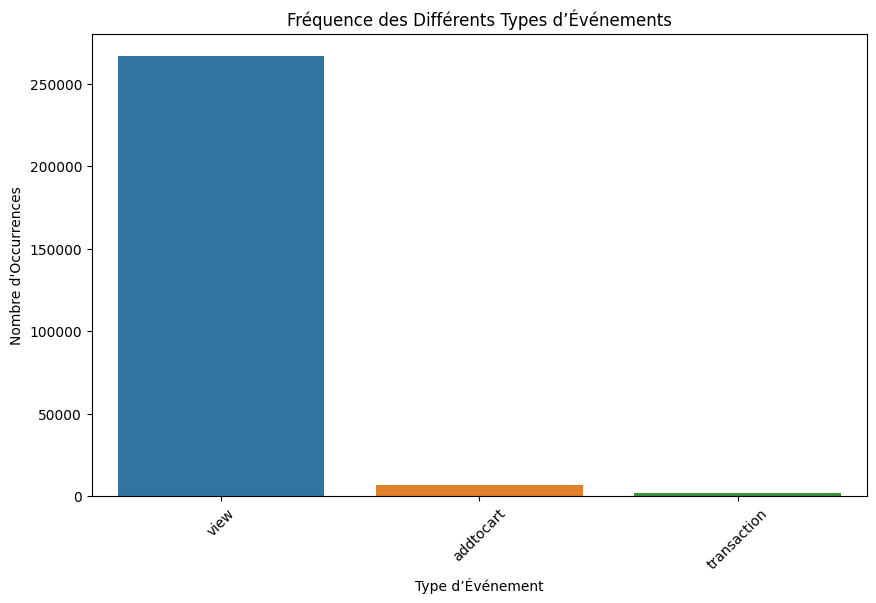

'Nombre de doublons dans df_events:'

6

In [ ]:
# Analyse des valeurs manquantes pour df_events
missing_values_events = df_events.isnull().sum()
display("Valeurs manquantes dans df_events", missing_values_events)

# Statistiques descriptives pour df_events
unique_visitors = df_events['visitorid'].nunique()
unique_items = df_events['itemid'].nunique()
events_count = df_events['event'].value_counts()
top_items_viewed = df_events[df_events['event'] == 'view']['itemid'].value_counts().head(10)

display("Nombre de visiteurs uniques", unique_visitors)
display("Nombre d'articles uniques", unique_items)
display("Fréquences des événements", events_count)
display("Top 10 des articles les plus consultés", top_items_viewed)

# Préparation des données pour la visualisation

# On compte le nombre d'occurrences de chaque type d'événement
event_counts = df_events['event'].value_counts()

# Visualisation : Histogramme des événements
plt.figure(figsize=(10, 6))
sns.barplot(x=event_counts.index, y=event_counts.values)
plt.title('Fréquence des Différents Types d’Événements')
plt.xlabel('Type d’Événement')
plt.ylabel('Nombre d\'Occurrences')
plt.xticks(rotation=45)
plt.show()

# Identification des doublons df_events
duplicates_events = df_events.duplicated().sum()
display("Nombre de doublons dans df_events:", duplicates_events)

In [ ]:
#

In [ ]:
#3ème fichier sur 4

In [ ]:
copied_path = 'drive/MyDrive/item_properties_part1.csv' #remove ‘content/’ from path then use
df_it_prop1 = pd.read_csv(copied_path)

In [ ]:
#Exploration initiale et Analyse descriptive de df_it_prop1

In [ ]:
display(df_it_prop1.head(10))
display(df_it_prop1.tail(10))
display(df_it_prop1.info())
df_it_prop1.describe()

,timestamp,itemid,property,value
0,1431226800000,59481,790,n15360.000
1,1431831600000,156781,917,828513
2,1431831600000,264312,6,319724
3,1434250800000,98113,451,1141052 n48.000
4,1437274800000,186518,available,0
5,1435460400000,178601,790,n5400.000
6,1437274800000,49337,0,n36.000 1186610 119932 717520 903287 98606 632...
7,1439694000000,48696,566,n480.000 639502 189174
8,1434250800000,269797,159,519769
9,1435460400000,334428,216,637368 190776


,timestamp,itemid,property,value
2520250,1442113200000,362293,available,1
2520251,1434250800000,38726,225,973211 1046037 n10800.000
2520252,1435460400000,169155,284,397563
2520253,1436065200000,108735,790,n14160.000
2520254,1435460400000,370872,917,n6177084.000
2520255,1433041200000,385426,846,769062
2520256,1435460400000,153032,1066,n1020.000 424566
2520257,1440298800000,421788,888,35975 856003 37346
2520258,1437879600000,159792,400,n552.000 639502 n720.000 424566
2520259,1436065200000,464846,790,n410640.000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520260 entries, 0 to 2520259
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 76.9+ MB


None

,timestamp,itemid
count,2.520260e+06,2.520260e+06
mean,1.435575e+12,2.332282e+05
std,3.403734e+09,1.346209e+05
min,1.431227e+12,6.000000e+00
25%,1.432436e+12,1.162060e+05
50%,1.435460e+12,2.334390e+05
75%,1.438484e+12,3.496800e+05
max,1.442113e+12,4.668640e+05


In [ ]:
#Ce script réalise une analyse similaire à celle que nous avons fait pour df_cat et df_events.
#Il commence par identifier les valeurs manquantes dans df_it_prop1,
#puis calcule des statistiques descriptives comme le nombre d'articles uniques et de propriétés uniques,
#et la fréquence des propriétés les plus courantes.
#Enfin, il visualise ces données à l'aide d'un histogramme en barres,
#mettant en avant les 10 propriétés les plus fréquentes puis le nbr de doublons

'Valeurs manquantes dans df_it_prop1'

timestamp    0
itemid       0
property     0
value        0
dtype: int64

"Nombre d'articles uniques dans df_it_prop1"

76470

'Nombre de propriétés uniques'

1043

'Top 10 des propriétés les plus fréquentes'

790           372942
888           361889
available     296664
categoryid     91223
283            61205
776            57963
6              54573
364            48715
202            45407
678            45169
Name: property, dtype: int64

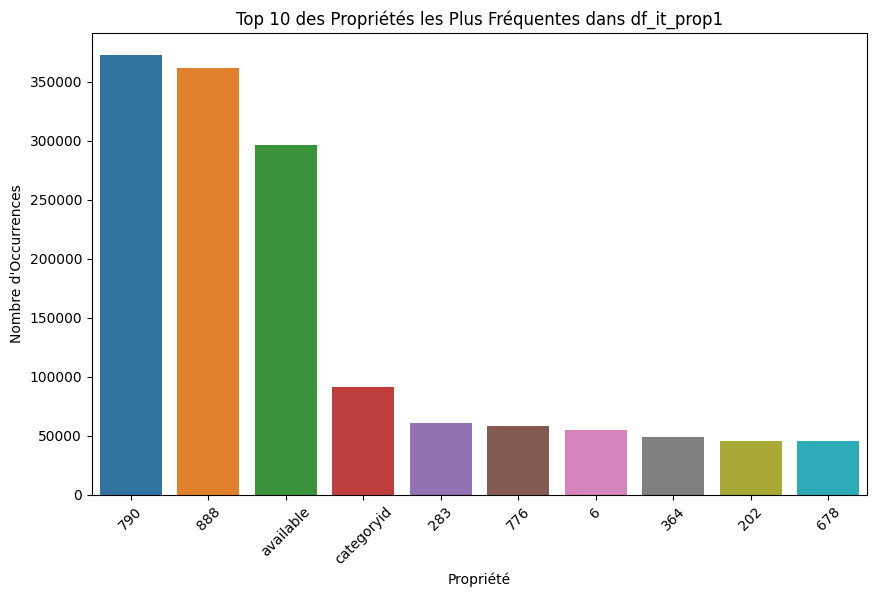

'Nombre de doublons dans df_it_prop1:'

0

In [ ]:
# Analyse des valeurs manquantes pour df_it_prop1
missing_values_it_prop1 = df_it_prop1.isnull().sum()
display("Valeurs manquantes dans df_it_prop1", missing_values_it_prop1)

# Statistiques descriptives pour df_it_prop1
unique_items_prop1 = df_it_prop1['itemid'].nunique()
unique_properties = df_it_prop1['property'].nunique()
top_properties = df_it_prop1['property'].value_counts().head(10)

display("Nombre d'articles uniques dans df_it_prop1", unique_items_prop1)
display("Nombre de propriétés uniques", unique_properties)
display("Top 10 des propriétés les plus fréquentes", top_properties)

# Préparation des données pour la visualisation

# On compte le nombre d'occurrences de chaque propriété
property_counts = df_it_prop1['property'].value_counts()

# Visualisation : Histogramme des 10 propriétés les plus fréquentes
plt.figure(figsize=(10, 6))
sns.barplot(x=property_counts.index[:10], y=property_counts.values[:10])
plt.title('Top 10 des Propriétés les Plus Fréquentes dans df_it_prop1')
plt.xlabel('Propriété')
plt.ylabel('Nombre d\'Occurrences')
plt.xticks(rotation=45)
plt.show()

# Identification des doublons df_it_prop1
duplicates_events = df_it_prop1.duplicated().sum()
display("Nombre de doublons dans df_it_prop1:", duplicates_events)

In [ ]:
#

In [ ]:
#4ème fichier sur 4

In [ ]:
copied_path = 'drive/MyDrive/item_properties_part2.csv' #remove ‘content/’ from path then use
df_it_prop2 = pd.read_csv(copied_path)

In [ ]:
#Exploration initiale et Analyse descriptive de df_it_prop2

In [ ]:
display(df_it_prop2.head(10))
display(df_it_prop2.tail(10))
display(df_it_prop2.info())
df_it_prop2.describe()

,timestamp,itemid,property,value
0,1438484400000,256368,888,437265 1296497 n24.000 229949 651738 285933
1,1431831600000,430773,283,257131 82777 493871 n27636.000 906078 939413
2,1435460400000,381893,790,n230280.000
3,1439694000000,112867,364,245911
4,1441508400000,281368,888,162712 866993 806659 370498 1297729 n12.000 90...
5,1433041200000,355004,698,571547
6,1435460400000,72802,790,n71760.000
7,1439089200000,234526,591,1116693
8,1433041200000,122350,1058,n24.000
9,1434250800000,16910,1036,769062 206386 769062


,timestamp,itemid,property,value
2115982,1431226800000,160705,678,539332
2115983,1433041200000,290837,920,488921
2115984,1437274800000,241233,790,n12048.000
2115985,1440298800000,358049,888,1320974 56529 237874 583354 1297729 n96.000 35...
2115986,1441508400000,27441,720,841575 10317
2115987,1435460400000,444741,categoryid,511
2115988,1439694000000,4849,888,297765 406279 907471 88645 279913 1223352 1318567
2115989,1436670000000,147935,790,n42720.000
2115990,1433646000000,279551,348,530843
2115991,1435460400000,10107,505,769062


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115992 entries, 0 to 2115991
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 64.6+ MB


None

,timestamp,itemid
count,2.115992e+06,2.115992e+06
mean,1.435571e+12,2.334157e+05
std,3.404602e+09,1.345766e+05
min,1.431227e+12,6.000000e+00
25%,1.432436e+12,1.166340e+05
50%,1.435460e+12,2.335990e+05
75%,1.438484e+12,3.499390e+05
max,1.442113e+12,4.668640e+05


In [ ]:
#Ce script réalise une analyse similaire à celle que nous avons fait pour df_cat et df_events.
#Il commence par identifier les valeurs manquantes dans df_it_prop2,
#puis calcule des statistiques descriptives comme le nombre d'articles uniques et de propriétés uniques,
#et la fréquence des propriétés les plus courantes.
#Enfin, il visualise ces données à l'aide d'un histogramme en barres,
#mettant en avant les 10 propriétés les plus fréquentes puis le nbr de doublons

'Valeurs manquantes dans df_it_prop2'

timestamp    0
itemid       0
property     0
value        0
dtype: int64

"Nombre d'articles uniques dans df_it_prop2"

76470

'Nombre de propriétés uniques'

1031

'Top 10 des propriétés les plus fréquentes'

790           314379
888           298695
available     248511
categoryid     76220
283            51640
776            49798
6              46289
364            41681
202            38618
678            38384
Name: property, dtype: int64

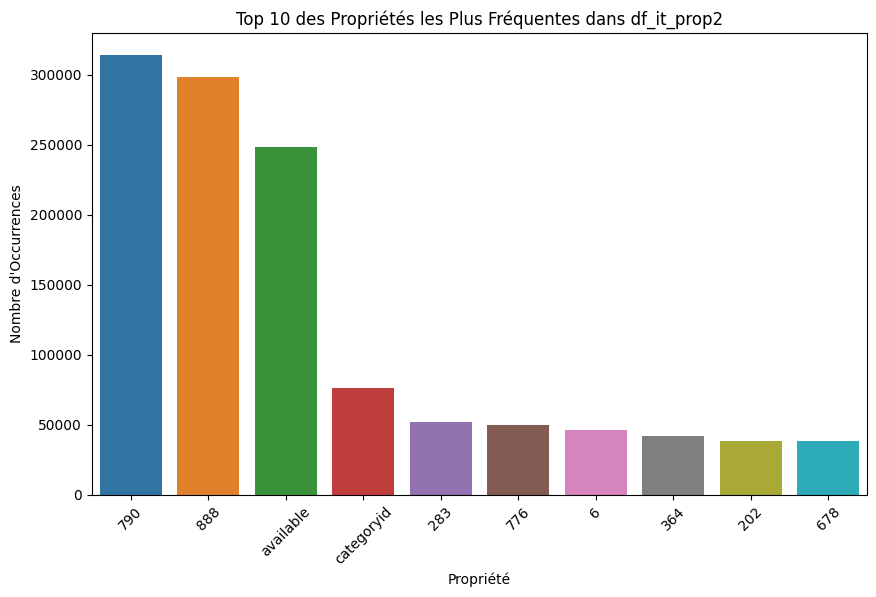

'Nombre de doublons dans df_it_prop2:'

0

In [ ]:
# Analyse des valeurs manquantes pour df_it_prop1
missing_values_it_prop2 = df_it_prop2.isnull().sum()
display("Valeurs manquantes dans df_it_prop2", missing_values_it_prop2)

# Statistiques descriptives pour df_it_prop1
unique_items_prop2 = df_it_prop2['itemid'].nunique()
unique_properties = df_it_prop2['property'].nunique()
top_properties = df_it_prop2['property'].value_counts().head(10)

display("Nombre d'articles uniques dans df_it_prop2", unique_items_prop2)
display("Nombre de propriétés uniques", unique_properties)
display("Top 10 des propriétés les plus fréquentes", top_properties)

# Préparation des données pour la visualisation

# Ici, on compte le nombre d'occurrences de chaque propriété
property_counts = df_it_prop2['property'].value_counts()

# Visualisation : Histogramme des 10 propriétés les plus fréquentes
plt.figure(figsize=(10, 6))
sns.barplot(x=property_counts.index[:10], y=property_counts.values[:10])
plt.title('Top 10 des Propriétés les Plus Fréquentes dans df_it_prop2')
plt.xlabel('Propriété')
plt.ylabel('Nombre d\'Occurrences')
plt.xticks(rotation=45)
plt.show()

# Identification des doublons df_it_prop2
duplicates_events = df_it_prop2.duplicated().sum()
display("Nombre de doublons dans df_it_prop2:", duplicates_events)

In [ ]:
#

In [ ]:
# Obtenir le nombre de lignes pour chaque table
nb_lignes_category_tree = df_cat.shape[0]
nb_lignes_events = df_events.shape[0]
nb_lignes_item_properties_part1 = df_it_prop1.shape[0]
nb_lignes_item_properties_part2 = df_it_prop2.shape[0]

print("Nombre de lignes dans category_tree:", nb_lignes_category_tree)
print("Nombre de lignes dans events:", nb_lignes_events)
print("Nombre de lignes dans item_properties_part1:", nb_lignes_item_properties_part1)
print("Nombre de lignes dans item_properties_part2:", nb_lignes_item_properties_part2)

Nombre de lignes dans category_tree: 1669
Nombre de lignes dans events: 275610
Nombre de lignes dans item_properties_part1: 2520260
Nombre de lignes dans item_properties_part2: 2115992


In [ ]:
#

In [ ]:
#A ce stade de l'analyse, nous allons traiter des Nan et du format des variables pour df_cat


In [ ]:
#1. Gérer les Valeurs Manquantes (NaN)
#Dans df_cat, il semble que les valeurs NaN soient présentes uniquement dans la colonne parentid.
#L'option choisie pour les gérer :

#Remplacer les NaN par une valeur spécifique car ces valeurs NaN ont une signification dans le contexte,
#indiquant des catégories de niveau supérieur sans parent.
#Nous les remplaçons par la valeur -1 :

In [ ]:
df_cat['parentid'].fillna(-1, inplace=True)


In [ ]:
#2. Vérifier et Modifier le Format des Variables
#Pour le format des variables,chaque colonne doit être dans le format approprié pour l'analyse.
#categoryid et parentid devraient être des entiers (int), car ils représentent des identifiants.

In [ ]:
# Vérifier les types de données
print(df_cat.dtypes)

# Convertir 'parentid' en entier (remplacé par -1 précédemment)
df_cat['parentid'] = df_cat['parentid'].astype(int)

print()

# Vérifier à nouveau les types de données
print(df_cat.dtypes)

categoryid      int64
parentid      float64
dtype: object

categoryid    int64
parentid      int64
dtype: object


In [ ]:
#Conséquences pour l'Analyse du remplacement des Nan par -1 dans df_cat['parentid'] :

#Analyse de la Hiérarchie : Avec cette modification, nous pouvons maintenant analyser plus facilement
#la structure hiérarchique de vos catégories.
#Les catégories avec parentid égal à -1 sont les catégories de niveau supérieur.

#Visualisation : Nous prévoyons de visualiser la structure de la catégorie avec un diagramme en arbre,
#cette modification facilitera l'identification et le traitement des catégories principales.

# Nous gardons à l'esprit que le -1 est une valeur artificielle,introduite pour une meilleure gestion des données.
# Cela doit est pris en compte dans toutes les analyses futures qui impliquent la colonne parentid.



In [ ]:
# Sélection des catégories principales et de leurs sous-catégories immédiates
main_categories = df_cat[df_cat['parentid'] == -1]
sub_categories = df_cat[df_cat['parentid'].isin(main_categories['categoryid'])]

# Fusion des deux ensembles
selected_categories = pd.concat([main_categories, sub_categories])

# Création du diagramme en arbre
fig = go.Figure(go.Treemap(
    ids=selected_categories['categoryid'],
    labels=selected_categories['categoryid'],
    parents=selected_categories['parentid']
))

fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig.show()


In [ ]:
# Exploration des Relations entre Catégories:

# Nous analysons la structure hiérarchique des catégories
# en examinant les relations parent-enfant entre les categoryid et parentid :

In [ ]:
# Identifier les catégories de niveau supérieur (sans parent)
top_level_categories = df_cat[df_cat['parentid'] == -1]

# Identifier les sous-catégories pour chaque catégorie de niveau supérieur
sub_categories = df_cat[df_cat['parentid'] != -1]

In [ ]:
# Compter le nombre de sous-catégories pour chaque catégorie parent
sub_category_counts = sub_categories['parentid'].value_counts()

print(sub_category_counts)

250     31
362     22
1009    22
351     19
1259    18
        ..
95       1
323      1
747      1
183      1
209      1
Name: parentid, Length: 362, dtype: int64


In [ ]:
#Interprétation des Résultats

#Catégories avec Beaucoup de Sous-Catégories : Les catégories avec le plus grand nombre de sous-catégories
#(comme la '250' ou la '362'ayant 31 et 22 sous-catégories, etc.) peuvent être des catégories générales ou très populaires.
#Elles pourraient représenter des segments de produits vastes ou diversifiés.


#Catégories avec Peu ou une sous-catégorie : ces catégories pourraient être plus spécialisées ou moins fréquentes.

In [ ]:
#

In [ ]:
#A ce stade de l'analyse, nous allons traiter des Nan et du format des variables pour df_event

In [ ]:
#1. Gérer les Valeurs Manquantes (NaN)
#Dans df_events, les valeurs NaN sont présentes uniquement dans la colonne transactionid.
#L'option choisie pour les gérer :

#Remplacer les NaN par une valeur spécifique car ces valeurs NaN ont une signification dans le contexte,
#et indiquent des événements qui ne sont pas des transactions (des vues ou des clics),
#Nous les remplaçons par la valeur -1 pour indiquer l'absence de transaction.


In [ ]:
df_events['transactionid'].fillna(-1, inplace=True)


In [ ]:
#2. Vérifier et Modifier le Format des Variables
#Pour le format des variables,chaque colonne doit être dans le format approprié pour l'analyse.
#timestamp doit être converti en un format datetime pour une analyse temporelle plus aisée.
#visitorid, itemid, et transactionid devraient être des entiers.

In [ ]:
# Convertir 'timestamp' en datetime
df_events['timestamp'] = pd.to_datetime(df_events['timestamp'], unit='ms')

# Créer la Colonne Mois

df_events['mois'] = df_events['timestamp'].dt.month

# Créer la Colonne Jour de la Semaine

df_events['jour_semaine'] = df_events['timestamp'].dt.day_name()

# Créer la Colonne Week-End

# weekday renvoie un nombre (où lundi = 0 et dimanche = 6),
# donc les jours de week-end (samedi et dimanche) sont ceux où ce nombre est supérieur à 4.

df_events['week_end'] = df_events['timestamp'].dt.weekday.apply(lambda x: 1 if x > 4 else 0)

# Créer la Colonne Jour du Mois

df_events['jour_mois'] = df_events['timestamp'].dt.day

# Créer la Colonne Heure

df_events['heure'] = df_events['timestamp'].dt.hour


# 'visitorid', 'itemid', et 'transactionid' sont des entiers
df_events['visitorid'] = df_events['visitorid'].astype(int)
df_events['itemid'] = df_events['itemid'].astype(int)
df_events['transactionid'] = df_events['transactionid'].astype(int)

# Vérifier les types de données après modification
display(df_events.dtypes)

# Afficher les premières lignes pour vérifier
display(df_events.head(10))

timestamp        datetime64[ns]
visitorid                 int64
event                    object
itemid                    int64
transactionid             int64
mois                      int64
jour_semaine             object
week_end                  int64
jour_mois                 int64
heure                     int64
dtype: object

,timestamp,visitorid,event,itemid,transactionid,mois,jour_semaine,week_end,jour_mois,heure
0,2015-06-27 04:23:03.392,389525,view,187002,-1,6,Saturday,1,27,4
1,2015-05-25 18:54:21.072,1179879,view,341578,-1,5,Monday,0,25,18
2,2015-05-15 23:28:09.334,958126,view,328966,-1,5,Friday,0,15,23
3,2015-09-02 03:31:09.677,527666,view,212144,-1,9,Wednesday,0,2,3
4,2015-08-21 18:15:07.132,1019714,view,153033,-1,8,Friday,0,21,18
5,2015-08-08 04:49:33.636,102445,view,270231,-1,8,Saturday,1,8,4
6,2015-08-01 11:02:10.670,392293,view,189558,-1,8,Saturday,1,1,11
7,2015-07-16 10:21:37.183,922849,view,442431,-1,7,Thursday,0,16,10
8,2015-05-18 02:24:31.975,186130,view,466436,-1,5,Monday,0,18,2
9,2015-07-27 23:53:57.180,1392733,view,100847,-1,7,Monday,0,27,23


In [ ]:
#

In [ ]:
#A ce stade de l'analyse, nous allons traiter des Nan et du format des variables pour df_it_prop1

In [ ]:
#1. Gérer les Valeurs Manquantes (NaN)
#Aucun Nan présent

In [ ]:
#2. Vérifier et Modifier le Format des Variables
#Pour le format des variables,chaque colonne doit être dans le format approprié pour l'analyse.
#timestamp devrait être converti en format datetime pour une analyse temporelle.
#itemid doit être un entier.

In [ ]:
# Convertir 'timestamp' en datetime
df_it_prop1['timestamp'] = pd.to_datetime(df_it_prop1['timestamp'], unit='ms')

# Créer la Colonne Mois

df_it_prop1['mois'] = df_it_prop1['timestamp'].dt.month

# Créer la Colonne Jour de la Semaine

df_it_prop1['jour_semaine'] = df_it_prop1['timestamp'].dt.day_name()

# Créer la Colonne Week-End

# weekday renvoie un nombre (où lundi = 0 et dimanche = 6),
# donc les jours de week-end (samedi et dimanche) sont ceux où ce nombre est supérieur à 4.

df_it_prop1['week_end'] = df_it_prop1['timestamp'].dt.weekday.apply(lambda x: 1 if x > 4 else 0)

# Créer la Colonne Jour du Mois

df_it_prop1['jour_mois'] = df_it_prop1['timestamp'].dt.day

# Créer la Colonne Heure

df_it_prop1['heure'] = df_it_prop1['timestamp'].dt.hour


# 'itemid' est un entier
df_it_prop1['itemid'] = df_it_prop1['itemid'].astype(int)

# Vérifier les types de données après modification
print(df_it_prop1.dtypes)

timestamp       datetime64[ns]
itemid                   int64
property                object
value                   object
mois                     int64
jour_semaine            object
week_end                 int64
jour_mois                int64
heure                    int64
dtype: object


In [ ]:
#

In [ ]:
#A ce stade de l'analyse, nous allons traiter des Nan et du format des variables pour df_it_prop2

In [ ]:
#1. Gérer les Valeurs Manquantes (NaN)
#Aucun Nan présent

In [ ]:
#2. Vérifier et Modifier le Format des Variables
#Pour le format des variables,chaque colonne doit être dans le format approprié pour l'analyse.
#timestamp devrait être converti en format datetime pour une analyse temporelle.
#itemid doit être un entier.

In [ ]:
# Convertir 'timestamp' en datetime
df_it_prop2['timestamp'] = pd.to_datetime(df_it_prop2['timestamp'], unit='ms')

# Créer la Colonne Mois

df_it_prop2['mois'] = df_it_prop2['timestamp'].dt.month

# Créer la Colonne Jour de la Semaine

df_it_prop2['jour_semaine'] = df_it_prop2['timestamp'].dt.day_name()

# Créer la Colonne Week-End

# weekday renvoie un nombre (où lundi = 0 et dimanche = 6),
# donc les jours de week-end (samedi et dimanche) sont ceux où ce nombre est supérieur à 4.

df_it_prop2['week_end'] = df_it_prop2['timestamp'].dt.weekday.apply(lambda x: 1 if x > 4 else 0)

# Créer la Colonne Jour du Mois

df_it_prop2['jour_mois'] = df_it_prop2['timestamp'].dt.day

# Créer la Colonne Heure

df_it_prop2['heure'] = df_it_prop2['timestamp'].dt.hour


# Assurer que 'itemid' est un entier
df_it_prop2['itemid'] = df_it_prop2['itemid'].astype(int)

# Vérifier les types de données après modification
print(df_it_prop2.dtypes)


timestamp       datetime64[ns]
itemid                   int64
property                object
value                   object
mois                     int64
jour_semaine            object
week_end                 int64
jour_mois                int64
heure                    int64
dtype: object


In [ ]:
#

In [ ]:
#Nous avons réalisé les étapes de nettoyage, d'information et d'uniformisation pour ces 4 df.

#Maintenant, nous allons envisager les fusions pertinentes ou pas entre ces quatre dataframes

In [ ]:
# Q1 :Concatener les jeux de données item_1 et item_2 dans un nouveau dataframe item

In [ ]:
# Concaténation des dataframes df_it_prop1 et df_it_prop2
item = pd.concat([df_it_prop1, df_it_prop2], ignore_index=True)

#Dans ce code, ignore_index=True est utilisé pour réinitialiser l'index dans le nouveau dataframe item.
#Cela garantit que les indices des deux dataframes originaux ne se chevauchent pas dans le dataframe concaténé.

In [ ]:
#Vérifications
display(item.head())

display(item.shape)

#La taille du nouveau dataframe est affiché pour s'assurer qu'il contient le nombre de lignes attendu,
#qui devrait être la somme des lignes des deux dataframes originaux

,timestamp,itemid,property,value,mois,jour_semaine,week_end,jour_mois,heure
0,2015-05-10 03:00:00,59481,790,n15360.000,5,Sunday,1,10,3
1,2015-05-17 03:00:00,156781,917,828513,5,Sunday,1,17,3
2,2015-05-17 03:00:00,264312,6,319724,5,Sunday,1,17,3
3,2015-06-14 03:00:00,98113,451,1141052 n48.000,6,Sunday,1,14,3
4,2015-07-19 03:00:00,186518,available,0,7,Sunday,1,19,3


(4636252, 9)

In [ ]:
# Q2: Supprimer les itemid qui sont présents dans le nouveau dataframe item
#(résultant de la concaténation de item_properties_part1 et item_properties_part2) mais pas dans df_events

# Nous effectuons une opération de filtrage :

# Filtrer les 'itemid' dans 'item' qui sont également présents dans 'df_events'
item_filtered = item[item['itemid'].isin(df_events['itemid'])]

# Cette ligne de code crée un nouveau dataframe item_filtered qui ne contient que les lignes de item
# où itemid est également présent dans df_events.




# Avant de procéder à la suppression des itemid dans df_events, nous vérifions s'il y a des itemid dans
#df_events qui ne sont pas présents dans item :

print("Nombre unique d'itemid dans df_events:", df_events['itemid'].nunique())
print("Nombre unique d'itemid dans item_filtered:", item_filtered['itemid'].nunique())



Nombre unique d'itemid dans df_events: 90424
Nombre unique d'itemid dans item_filtered: 76470


In [ ]:
#La différence dans le nombre d'itemid uniques entre df_events et item_filtered indique
#que certains itemid dans df_events ne se trouvent pas dans le nouveau dataframe item.
#C'est normal et attendu, étant donné que nous avons filtré item pour ne garder que
#les itemid présents dans df_events.

#Le fait que item_filtered contienne moins d'itemid uniques que df_events (76470 contre 90424)
#suggère que item ne couvre pas tous les itemid de df_events.
#Cela peut être dû à diverses raisons, telles que des enregistrements manquants ou
#des différences dans la période de collecte des données entre les deux ensembles de données.

In [ ]:
# Q3 : créer deux nouveaux DataFrames item_availability et item_categoryid à partir du dataframe item_filtered

# Pour créer deux nouveaux DataFrames item_availability et item_categoryid à partir du dataframe item_filtered,
# Nous devons filtrer les données en fonction de la valeur de la colonne property :


In [ ]:
# Créer item_availability
#Ce DataFrame contiendra les lignes où property est égal à "available" :

#item_availability = item_filtered[item_filtered['property'] == 'available']

item_availability = item_filtered[item_filtered['property'] == 'available'].copy()

# Nous utilisons la méthode .copy() pour créer explicitement une copie indépendante du DataFrame
# lors de sa création initiale : créez une copie indépendante du DataFrame élimine le SettingWithCopyWarning
# lorsque du tri plus tard.


In [ ]:
#Créer item_categoryid
#Ce DataFrame contiendra les lignes où property est égal à "categoryid" :

item_categoryid = item_filtered[item_filtered['property'] == 'categoryid'].copy()


In [ ]:
# Vérification et exploration :

# Vérifier les premières lignes et la structure des nouveaux DataFrames
display(item_availability.head())
display(item_categoryid.head())

display("Nombre de lignes dans item_availability:", item_availability.shape[0])
display("Nombre de lignes dans item_categoryid:", item_categoryid.shape[0])

,timestamp,itemid,property,value,mois,jour_semaine,week_end,jour_mois,heure
4,2015-07-19 03:00:00,186518,available,0,7,Sunday,1,19,3
28,2015-07-19 03:00:00,430459,available,0,7,Sunday,1,19,3
32,2015-05-31 03:00:00,411262,available,0,5,Sunday,1,31,3
39,2015-09-06 03:00:00,289043,available,0,9,Sunday,1,6,3
42,2015-06-28 03:00:00,365407,available,0,6,Sunday,1,28,3


,timestamp,itemid,property,value,mois,jour_semaine,week_end,jour_mois,heure
48,2015-06-28 03:00:00,35575,categoryid,1059,6,Sunday,1,28,3
94,2015-09-06 03:00:00,76417,categoryid,1244,9,Sunday,1,6,3
109,2015-05-31 03:00:00,96660,categoryid,498,5,Sunday,1,31,3
128,2015-09-06 03:00:00,244437,categoryid,438,9,Sunday,1,6,3
200,2015-08-02 03:00:00,313481,categoryid,1613,8,Sunday,1,2,3


'Nombre de lignes dans item_availability:'

545175

'Nombre de lignes dans item_categoryid:'

167443

In [ ]:
#Q4 : Faire une première jointure merge_asof entre df et item_availability (dans un dataframe nommé merged_1 par ex)



In [ ]:
# Pour effectuer une jointure de type merge_asof entre df_events et item_availability, nous devons d'abord
# nous assurer que les deux DataFrames ont une colonne en commun sur laquelle la jointure peut être effectuée.
# Typiquement, pour merge_asof, cette colonne est souvent une colonne de temps.

In [ ]:
# Étape 1: Préparation des DataFrames
# On s'assure que les colonnes timestamp sont triées dans les deux DataFrames :

df_events.sort_values(by='timestamp', inplace=True)
item_availability.sort_values(by='timestamp', inplace=True)

In [ ]:
#Étape 2: Jointure avec merge_asof

merged_1 = pd.merge_asof(df_events, item_availability, on='timestamp', by='itemid', direction="nearest")

#Le paramètre by='itemid' assure que la jointure est également basée sur la correspondance des
#itemid entre les deux DataFrames et le paramètre direction="nearest" permet l'ajustement des
#timestamps pour éviter des NaN

In [ ]:
#Étape 3: Vérification du résultat

display(merged_1.head())

display(merged_1.dtypes)

,timestamp,visitorid,event,itemid,transactionid,mois_x,jour_semaine_x,week_end_x,jour_mois_x,heure_x,property,value,mois_y,jour_semaine_y,week_end_y,jour_mois_y,heure_y
0,2015-05-03 03:00:27.031,1149227,view,29757,-1,5,Sunday,1,3,3,available,1,5.0,Sunday,1.0,31.0,3.0
1,2015-05-03 03:00:28.399,477106,view,297347,-1,5,Sunday,1,3,3,available,0,6.0,Sunday,1.0,28.0,3.0
2,2015-05-03 03:00:36.210,654913,view,149767,-1,5,Sunday,1,3,3,available,1,5.0,Sunday,1.0,31.0,3.0
3,2015-05-03 03:00:51.805,1222029,view,75831,-1,5,Sunday,1,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-05-03 03:01:55.328,375734,view,282298,-1,5,Sunday,1,3,3,available,1,5.0,Sunday,1.0,10.0,3.0


timestamp         datetime64[ns]
visitorid                  int64
event                     object
itemid                     int64
transactionid              int64
mois_x                     int64
jour_semaine_x            object
week_end_x                 int64
jour_mois_x                int64
heure_x                    int64
property                  object
value                     object
mois_y                   float64
jour_semaine_y            object
week_end_y               float64
jour_mois_y              float64
heure_y                  float64
dtype: object

In [ ]:
#Q5 : Deuxième jointure merge_asof entre merged_1 et item_category (dans un dataframe nommé merged_2 par ex)

# Étape 1: Préparer item_categoryid
# nous vérifions que item_categoryid est trié par timestamp et que la colonne itemid est présente pour la jointure:

item_categoryid.sort_values(by='timestamp', inplace=True)

In [ ]:
# Étape 2: Effectuer la jointure merge_asof
# Cette jointure se fait entre merged_1 et item_categoryid, en utilisant à nouveau timestamp comme clé de jointure
# et en s'assurant que les itemid correspondent :

merged_2 = pd.merge_asof(merged_1, item_categoryid, on='timestamp', by='itemid', direction="nearest", suffixes=('_x', '_y'))


In [ ]:
# Étape 3: Vérification du résultat

display(merged_2.head())

display(merged_2.dtypes)

,timestamp,visitorid,event,itemid,transactionid,mois_x,jour_semaine_x,week_end_x,jour_mois_x,heure_x,...,week_end_y,jour_mois_y,heure_y,property_y,value_y,mois,jour_semaine,week_end,jour_mois,heure
0,2015-05-03 03:00:27.031,1149227,view,29757,-1,5,Sunday,1,3,3,...,1.0,31.0,3.0,categoryid,858,5.0,Sunday,1.0,10.0,3.0
1,2015-05-03 03:00:28.399,477106,view,297347,-1,5,Sunday,1,3,3,...,1.0,28.0,3.0,categoryid,1674,5.0,Sunday,1.0,10.0,3.0
2,2015-05-03 03:00:36.210,654913,view,149767,-1,5,Sunday,1,3,3,...,1.0,31.0,3.0,categoryid,368,5.0,Sunday,1.0,17.0,3.0
3,2015-05-03 03:00:51.805,1222029,view,75831,-1,5,Sunday,1,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-05-03 03:01:55.328,375734,view,282298,-1,5,Sunday,1,3,3,...,1.0,10.0,3.0,categoryid,1613,5.0,Sunday,1.0,10.0,3.0


timestamp         datetime64[ns]
visitorid                  int64
event                     object
itemid                     int64
transactionid              int64
mois_x                     int64
jour_semaine_x            object
week_end_x                 int64
jour_mois_x                int64
heure_x                    int64
property_x                object
value_x                   object
mois_y                   float64
jour_semaine_y            object
week_end_y               float64
jour_mois_y              float64
heure_y                  float64
property_y                object
value_y                   object
mois                     float64
jour_semaine              object
week_end                 float64
jour_mois                float64
heure                    float64
dtype: object

In [ ]:
# Q6 : Renommer les variables value_x et value_y trouvés après le merge par des noms plus informatifs
#(soit available et category_id) et supprimer les variables property_x et property_y.

In [ ]:
# Étape 1: Renommer les colonnes

merged_2.rename(columns={'value_x': 'available', 'value_y': 'category_id'}, inplace=True)

In [ ]:
# Étape 2: Supprimer les colonnes inutiles

merged_2.drop(columns=['property_x', 'property_y'], inplace=True)


In [ ]:
# Étape 3: Vérifier le résultat

display(merged_2.head())

display(merged_2.dtypes)

,timestamp,visitorid,event,itemid,transactionid,mois_x,jour_semaine_x,week_end_x,jour_mois_x,heure_x,...,jour_semaine_y,week_end_y,jour_mois_y,heure_y,category_id,mois,jour_semaine,week_end,jour_mois,heure
0,2015-05-03 03:00:27.031,1149227,view,29757,-1,5,Sunday,1,3,3,...,Sunday,1.0,31.0,3.0,858,5.0,Sunday,1.0,10.0,3.0
1,2015-05-03 03:00:28.399,477106,view,297347,-1,5,Sunday,1,3,3,...,Sunday,1.0,28.0,3.0,1674,5.0,Sunday,1.0,10.0,3.0
2,2015-05-03 03:00:36.210,654913,view,149767,-1,5,Sunday,1,3,3,...,Sunday,1.0,31.0,3.0,368,5.0,Sunday,1.0,17.0,3.0
3,2015-05-03 03:00:51.805,1222029,view,75831,-1,5,Sunday,1,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-05-03 03:01:55.328,375734,view,282298,-1,5,Sunday,1,3,3,...,Sunday,1.0,10.0,3.0,1613,5.0,Sunday,1.0,10.0,3.0


timestamp         datetime64[ns]
visitorid                  int64
event                     object
itemid                     int64
transactionid              int64
mois_x                     int64
jour_semaine_x            object
week_end_x                 int64
jour_mois_x                int64
heure_x                    int64
available                 object
mois_y                   float64
jour_semaine_y            object
week_end_y               float64
jour_mois_y              float64
heure_y                  float64
category_id               object
mois                     float64
jour_semaine              object
week_end                 float64
jour_mois                float64
heure                    float64
dtype: object

In [ ]:
# Q7 : Faire une dernière jointure à gauche entre merged_2 et le csv category_tree.
#Ici on fait une jointure à gauche pour ne pas perdre les informations sur les produits qui n'ont pas
#de category dans le dataframe.

In [ ]:
# Dans cette jointure, nous alignons les données en fonction de la colonne category_id dans merged_2
# et de la colonne categoryid dans df_cat donc nous devons nous assurer que les types de données des
# colonnes utilisées pour la jointure sont identiques.

# Étape 1:  Préparation pour la jointure
# on s'assure que les colonnes à joindre (category_id dans merged_2 et categoryid dans df_cat) sont du même type

merged_2['category_id'] = merged_2['category_id'].astype('float')
df_cat['categoryid'] = df_cat['categoryid'].astype('float')

In [ ]:
# Étape 2: Effectuer la jointure à gauche :

final_merged = pd.merge(merged_2, df_cat, how='left', left_on='category_id', right_on='categoryid')

In [ ]:
# Étape 3: Vérification du résultat :

display(final_merged.head())

,timestamp,visitorid,event,itemid,transactionid,mois_x,jour_semaine_x,week_end_x,jour_mois_x,heure_x,...,jour_mois_y,heure_y,category_id,mois,jour_semaine,week_end,jour_mois,heure,categoryid,parentid
0,2015-05-03 03:00:27.031,1149227,view,29757,-1,5,Sunday,1,3,3,...,31.0,3.0,858.0,5.0,Sunday,1.0,10.0,3.0,858.0,1426.0
1,2015-05-03 03:00:28.399,477106,view,297347,-1,5,Sunday,1,3,3,...,28.0,3.0,1674.0,5.0,Sunday,1.0,10.0,3.0,1674.0,1420.0
2,2015-05-03 03:00:36.210,654913,view,149767,-1,5,Sunday,1,3,3,...,31.0,3.0,368.0,5.0,Sunday,1.0,17.0,3.0,368.0,901.0
3,2015-05-03 03:00:51.805,1222029,view,75831,-1,5,Sunday,1,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-05-03 03:01:55.328,375734,view,282298,-1,5,Sunday,1,3,3,...,10.0,3.0,1613.0,5.0,Sunday,1.0,10.0,3.0,1613.0,250.0


In [ ]:
# Q8 : Générer 3 nouvelles variables "addtocart", "transaction", "view" à partir de la variable 'event'


In [ ]:
# Pour générer trois nouvelles variables (colonnes) addtocart, transaction, view à partir de la
#variable event dans final_merged, nous pouvons utiliser une technique appelée "one-hot encoding".
#Cela implique de créer une nouvelle colonne pour chaque valeur unique dans event, où chaque
#colonne contiendra des valeurs binaires (0 ou 1) indiquant la présence de cet événement.


# Étape 1: Étape 1: Créer les nouvelles colonnes
# Nous créons trois nouvelles colonnes, chacune correspondant à une valeur différente de event
#('addtocart', 'transaction', 'view').
# Chaque colonne aura une valeur de 1 là où event correspond à cette valeur, et 0 sinon.

#Étape 1: Créer les nouvelles colonnes

final_merged['addtocart'] = (final_merged['event'] == 'addtocart').astype(int)
final_merged['transaction'] = (final_merged['event'] == 'transaction').astype(int)
final_merged['view'] = (final_merged['event'] == 'view').astype(int)


# Étape 2: Vérification des nouvelles colonnes
display(final_merged[['event', 'addtocart', 'transaction', 'view']].head())



display(final_merged.dtypes)

,event,addtocart,transaction,view
0,view,0,0,1
1,view,0,0,1
2,view,0,0,1
3,view,0,0,1
4,view,0,0,1


timestamp         datetime64[ns]
visitorid                  int64
event                     object
itemid                     int64
transactionid              int64
mois_x                     int64
jour_semaine_x            object
week_end_x                 int64
jour_mois_x                int64
heure_x                    int64
available                 object
mois_y                   float64
jour_semaine_y            object
week_end_y               float64
jour_mois_y              float64
heure_y                  float64
category_id              float64
mois                     float64
jour_semaine              object
week_end                 float64
jour_mois                float64
heure                    float64
categoryid               float64
parentid                 float64
addtocart                  int64
transaction                int64
view                       int64
dtype: object

In [ ]:
print(final_merged.columns)

Index(['timestamp', 'visitorid', 'event', 'itemid', 'transactionid', 'mois_x',
       'jour_semaine_x', 'week_end_x', 'jour_mois_x', 'heure_x', 'available',
       'mois_y', 'jour_semaine_y', 'week_end_y', 'jour_mois_y', 'heure_y',
       'category_id', 'mois', 'jour_semaine', 'week_end', 'jour_mois', 'heure',
       'categoryid', 'parentid', 'addtocart', 'transaction', 'view'],
      dtype='object')


In [ ]:
# Q9 : Faire un groupby item_id et appliquer une agrégation sur les variables
# "addtocart" -> somme
# "transaction" -> somme
# "view" -> somme
# "available" -> garder que la dernière valeur
# "category_id" -> garder la première valeur
# "parentid" -> garder la première valeur
# "mois"-> garder le nombre de mois unique
# "visitorid"-> garder le nombre de visiteurs uniques qui ont consulté le produit

In [ ]:
# D'après l'index des colonnes et les types de données, il semble que nous ayons des colonnes en double
#dans final_merged, notamment addtocart, transaction, et view.
#Cela peutt être une source d'erreur  lors de l'agrégation.

In [ ]:
# Étape de préparation: Supprimer les colonnes en double
# Avant d'effectuer l'agrégation, nous supprimons les colonnes en double :

# Garder une seule instance de chaque colonne en double
cols_to_keep = {
    'addtocart': 'addtocart',
    'transaction': 'transaction',
    'view': 'view'
}
final_merged = final_merged.loc[:, ~final_merged.columns.duplicated()].rename(columns=cols_to_keep)

In [ ]:
#  Pour effectuer un groupement par itemid dans le DataFrame final_merged et appliquer les agrégations
#spécifiées sur différentes colonnes, nous pouvons utiliser la méthode groupby de Pandas en combinaison
#avec .agg() :


# Étape 1: Groupement et Agrégation

aggregated_data = final_merged.groupby('itemid').agg({
    'addtocart': 'sum',                   # Somme des valeurs pour addtocart
    'transaction': 'sum',                 # Somme des valeurs pour transaction
    'view': 'sum',                        # Somme des valeurs pour view
    'available': 'last',                  # Dernière valeur pour available
    'category_id': 'first',               # Première valeur pour category_id
    'parentid': 'first',                  # Première valeur pour parentid
    'mois': pd.Series.nunique,            # Nombre de mois uniques
    'visitorid': pd.Series.nunique        # Nombre de visiteurs uniques
}).reset_index()


In [ ]:
# Étape 2: Vérification des résultats

display(aggregated_data.head())


,itemid,addtocart,transaction,view,available,category_id,parentid,mois,visitorid
0,6,0,0,3,0,1091.0,573.0,1,3
1,16,0,0,4,1,333.0,1497.0,1,4
2,19,0,0,1,1,1171.0,938.0,1,1
3,25,0,0,3,1,1509.0,620.0,2,3
4,32,0,0,6,0,1173.0,805.0,1,6
